In [1]:
from qiskit import BasicAer, Aer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import ad_hoc_data

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
seed = 1376
algorithm_globals.random_seed = seed

In [3]:
# Descomente la siguiente linea si desea ver las imágenes más grandes.
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

In [4]:
# Use ad hoc data set for training and test data
feature_dim = 2  # dimension of each data point
training_size = 20
test_size = 10

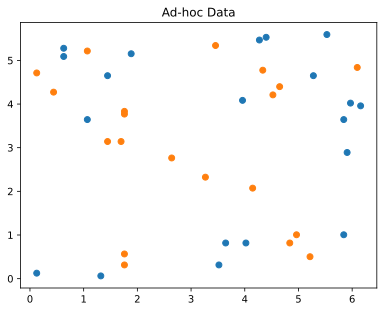

In [5]:
# training features, training labels, test features, test labels as np.array,
# one hot encoding for labels
training_features, training_labels, test_features, test_labels = \
    ad_hoc_data(
            training_size=training_size, test_size=test_size, n=feature_dim, gap=0.3, plot_data=True)
# Explicación de ad_hoc_data() en: https://qiskit.org/documentation/machine-learning/stubs/qiskit_machine_learning.datasets.ad_hoc_data.html

In [6]:
print(training_features)
print('  ')
print(training_features.shape)

[[3.95840674 4.08407045]
 [1.31946891 0.06283185]
 [4.0212386  0.81681409]
 [4.27256601 5.46637122]
 [5.90619419 2.89026524]
 [4.39822972 5.52920307]
 [5.84336234 1.00530965]
 [3.51858377 0.31415927]
 [1.88495559 5.15221195]
 [5.96902604 4.0212386 ]
 [3.64424748 0.81681409]
 [6.1575216  3.95840674]
 [0.62831853 5.27787566]
 [5.52920307 5.59203492]
 [1.44513262 4.64955713]
 [0.12566371 0.12566371]
 [5.27787566 4.64955713]
 [1.0681415  3.64424748]
 [5.84336234 3.64424748]
 [0.62831853 5.0893801 ]
 [0.43982297 4.27256601]
 [1.44513262 3.14159265]
 [6.09468975 4.83805269]
 [4.33539786 4.77522083]
 [4.64955713 4.39822972]
 [1.75929189 3.76991118]
 [4.1469023  2.07345115]
 [3.45575192 5.34070751]
 [1.75929189 3.83274304]
 [0.12566371 4.71238898]
 [1.69646003 3.14159265]
 [2.63893783 2.76460154]
 [4.83805269 0.81681409]
 [4.52389342 4.20973416]
 [5.2150438  0.50265482]
 [1.75929189 0.31415927]
 [3.26725636 2.32477856]
 [4.96371639 1.00530965]
 [1.0681415  5.2150438 ]
 [1.75929189 0.56548668]]

In [7]:
print(training_features.max())

6.157521601035995


In [8]:
#print(training_labels)
#print('  ')
#print(training_labels.shape)

In [9]:
# print(test_features.shape)
# print(test_labels.shape)

In [10]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

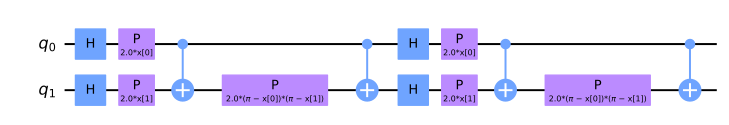

In [11]:
display(feature_map.decompose().draw('mpl'))

In [12]:
ansatz = TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3)

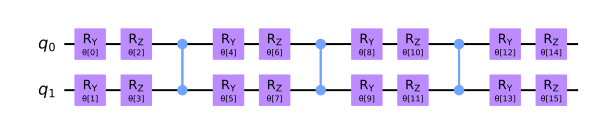

In [13]:
display(ansatz.decompose().draw('mpl'))

In [14]:
# callback function that draws a live plot when the .fit() method is called
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [15]:
# construct variational quantum classifier
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=COBYLA(maxiter=100),
#          quantum_instance = quantum_instance
          callback=callback_graph
         )

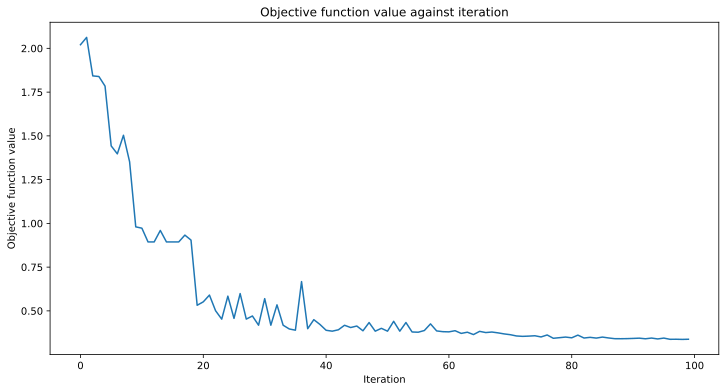

In [16]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
#vqc.fit(X, y_one_hot)
vqc.fit(training_features, training_labels)

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# Codigo tomado de https://qiskit.org/documentation/machine-learning/tutorials/02_neural_network_classifier_and_regressor.html

In [17]:
# score classifier
#vqc.score(X, y_one_hot)
score_training = vqc.score(training_features, training_labels)

print(f"Training accuracy: {score_training:0.2f}")

Training accuracy: 1.00


In [18]:
score_test = vqc.score(test_features, test_labels)

print(f"Testing accuracy: {score_test :0.2f}")

Testing accuracy: 0.95


In [19]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright